In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
sns.__version__

'0.11.0'

In [173]:
pd.set_option('display.max_columns', 89)
df = pd.read_csv("data.csv", index_col=0)
# df.describe()
# df.head(10)
# df.shape


In [174]:
df.isna().sum(axis = 0)

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [175]:
df.dropna(subset = ['Club'], inplace = True)

In [176]:
df.isna().sum(axis = 0).head(30)

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                            0
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       48
Jersey Number                  48
Joined                       1312
Loaned From                 16702
Contract Valid Until           48
Height                         48
Weight                         48
LS                           2040
ST                           2040
RS            

In [177]:
df.dropna(subset = ['Weak Foot'], inplace = True)
df.reset_index(drop = True, inplace = True)
df.isna().sum(axis = 0)


ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1275
Length: 88, dtype: int64

In [178]:
len(df['Name'].unique()),df.shape

(16924, (17918, 88))

In [179]:
df[df.duplicated()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


##### Ques 5 What is the age distribution in different clubs? Which club has most players young?

In [180]:
df.groupby(['Club'])
df.dtypes

ID                  int64
Name               object
Age                 int64
Photo              object
Nationality        object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 88, dtype: object

In [11]:
a = df.groupby('Club').agg({'Age': lambda x: ','.join([str(i) for i in list(x.values)])})
a.reset_index(inplace = True)
Threshold = df.Age.mean()
a['Count of Young Players'] = a['Age'].apply(lambda x: (np.array([int(i) for i in x.split(',')])<Threshold).sum())

In [12]:
a.head()

,Club,Age,Count of Young Players
0,SSV Jahn Regensburg,"32,33,29,25,25,29,25,25,26,28,27,26,24,22,23,3...",16
1,1. FC Heidenheim 1846,"32,27,30,27,31,29,23,27,31,25,23,24,27,25,23,2...",19
2,1. FC Kaiserslautern,"23,28,25,26,27,27,32,25,21,33,27,22,25,20,21,2...",18
3,1. FC Köln,"25,28,21,30,22,28,23,28,27,25,28,27,26,28,26,3...",16
4,1. FC Magdeburg,"31,27,26,30,32,30,22,24,21,30,21,25,29,27,23,2...",17


In [13]:
a.sort_values(['Count of Young Players'], ascending = False, inplace = True)
a.reset_index(drop = True, inplace = True)

In [14]:
a

,Club,Age,Count of Young Players
0,Barnsley,"25,23,25,24,25,23,23,25,22,25,24,25,23,23,25,2...",28
1,Envigado FC,"22,29,21,23,23,25,24,23,21,23,21,25,23,21,20,2...",26
2,FC Sochaux-Montbéliard,"24,26,20,24,22,20,21,23,20,25,20,22,24,22,28,2...",26
3,RC Celta,"30,21,27,23,23,31,24,24,25,24,22,32,27,26,22,3...",26
4,Chamois Niortais Football Club,"32,24,23,27,22,18,19,22,24,22,23,22,24,19,22,3...",25
...,...,...,...
646,Vitória,"34,26,30,26,34,34,30,26,26,34,26,34,30,26,34,2...",0
647,Chapecoense,"26,34,34,34,34,34,30,30,26,30,30,30,34,30,34,3...",0
648,Botafogo,"26,30,26,26,26,26,26,34,34,34,34,30,34,26,26,3...",0
649,América FC (Minas Gerais),"30,26,30,26,26,34,26,26,30,30,34,30,26,26,26,3...",0


In [15]:
lst = []
lst1 = []
lst = list(a['Age'])
for i in range(0, len(lst)):
    lst1.append(lst[i].split(','))
for i in range(0, len(lst1)):
    for j in range(0, len(lst1[i])):
        lst1[i][j] = int(lst1[i][j])
#     lst2.append(i)

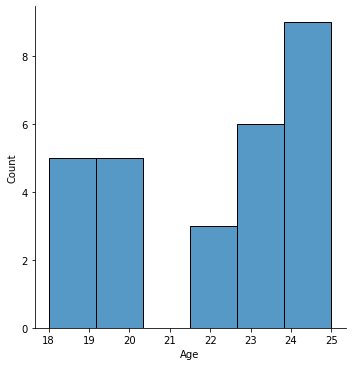

In [16]:
sns.displot(lst1[0], kind = 'hist').set(xlabel = 'Age')
plt.show()

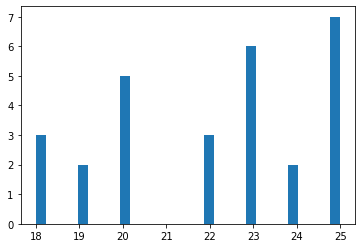

In [17]:
# fig, axs = plt.subplots(5, 10 figsize=(2, 5), sharex=True, sharey=True,
#                         tight_layout=True)
plt.hist(lst1[0], bins = 29)

# We can increase the number of bins on each axis
# axs[0].hist(x, y, bins=40)

# # As well as define normalization of the colors
# axs[1].hist(x, y, bins=40, norm=colors.LogNorm())

# # We can also define custom numbers of bins for each axis
# axs[2].hist(x, y, bins=(80, 10), norm=colors.LogNorm())

plt.show()


In [18]:
# use seaborn dist, histogram

In [19]:
# df.Age.min(), df.Age.max(), df.Age.median()
df.Age.describe()

count    17918.000000
mean        25.105257
std          4.675372
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

###### Ques 3(a)

In [20]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [21]:
var_target = ['Potential']
var_traits = ['Special' , 'Skill Moves' , 'Weak Foot' , 'Work Rate' , 'Body Type' , 'Height', 'Weight', 'Age']
var_skills = ['Crossing' , 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [22]:
X_q3 = df.loc[:,var_skills]
Y_q3 = df.loc[:,var_target]
top = 5
c = np.array(list(X_q3.columns))
scaler = StandardScaler()
X_q3 = scaler.fit_transform(X_q3)
reg = LinearRegression().fit(X_q3, Y_q3)
print(c[np.argsort(-np.abs(reg.coef_))][0][0:top])

['BallControl' 'Dribbling' 'ShortPassing' 'Reactions' 'Crossing']


###### Q_3(b)

In [84]:
X_q3 = df.loc[:,var_traits]
Y_q3 = df.loc[:,var_target]

In [85]:
my_dict = {'Messi': 9,
           'C. Ronaldo': 10, 
           'Neymar': 8, 
           'Lean': 9, 
           'Normal': 7,
           'Courtois': 7,
           'Stocky': 6, 
           'PLAYER_BODY_TYPE_25' : 1, 
           'Shaqiri' : 8, 
           'Akinfenwa' : 6}
X_q3['Weight'] = X_q3['Weight'].apply(lambda x: np.float64(x.replace('lbs','')))
X_q3['Body Type'] = X_q3['Body Type'].apply(lambda x: my_dict.get(x))

In [86]:
enc = OneHotEncoder(handle_unknown='ignore')
X = X_q3[['Work Rate']].values
enc.fit(X)
temp_X = enc.transform(X)
temp_X.toarray()
temp_df = pd.DataFrame(data = temp_X.toarray(), columns = enc.categories_)
X_q3.drop(['Work Rate'], axis = 1, inplace = True)
X_q3 = pd.concat([X_q3,temp_df], axis=1)
def con_height (row):
        h = [int(i) for i in str(row).split("'")]
        return 12*h[0] + h[1]
    
X_q3['Height'] = X_q3['Height'].apply(con_height)

In [87]:
X_q3.head()

,Special,Skill Moves,Weak Foot,Body Type,Height,Weight,Age,"(High/ High,)","(High/ Low,)","(High/ Medium,)","(Low/ High,)","(Low/ Low,)","(Low/ Medium,)","(Medium/ High,)","(Medium/ Low,)","(Medium/ Medium,)"
0,2202,4.0,4.0,9,67,159.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2228,5.0,4.0,10,74,183.0,33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2143,5.0,5.0,8,69,150.0,26,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1471,1.0,3.0,9,76,168.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2281,4.0,5.0,7,71,154.0,27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
top = 5
c = np.array(list(X_q3.columns))
scaler = StandardScaler()
X_q3 = scaler.fit_transform(X_q3)
reg = LinearRegression().fit(X_q3, Y_q3)
print(c[np.argsort(-np.abs(reg.coef_))][0][0:top])

['Special' 'Weight' 'Height' 'Skill Moves' ('High/ High',)]


/home/urg/miniconda3/envs/urg_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


##### Ques 1

In [232]:
df.groupby(['Club']).mean().Overall

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.208333
Name: Overall, Length: 651, dtype: float64

In [235]:
# df['Wage'] = df['Wage'].apply(lambda x: (x.replace('K','')))
# df['Wage'] = df['Wage'].apply(lambda x: np.float64(x.replace('€','')))
df['Wage']

0        565.0
1        405.0
2        290.0
3        260.0
4        355.0
         ...  
17913      1.0
17914      1.0
17915      1.0
17916      1.0
17917      1.0
Name: Wage, Length: 17918, dtype: float64

In [245]:
a = df.groupby('Club').agg({'Wage': 'sum', 'Overall': 'mean'})
a['Overall/Wage'] = a['Overall']/a['Wage']
a.sort_values(by = 'Overall/Wage', ascending = False).head(10)

,Wage,Overall,Overall/Wage
Club,,,
Sligo Rovers,19.0,56.631579,2.980609
Derry City,19.0,55.777778,2.935673
Viktoria Plzeň,24.0,69.416667,2.892361
Limerick FC,19.0,54.526316,2.869806
Shamrock Rovers,22.0,60.090909,2.731405
Dalkurd FF,22.0,59.761905,2.716450
Spartak Moscow,27.0,73.185185,2.710562
PAOK,27.0,72.444444,2.683128
Shakhtar Donetsk,28.0,72.821429,2.600765


count    17918.000000
mean         9.883748
std         22.142769
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: Wage, dtype: float64

##### Q_4

In [136]:
var_target = ['Wage']
var_features = ['Wage', 'Overall', 'Potential','Special' , 'Skill Moves' , 'Weak Foot' , 'Work Rate' , 'Body Type' , 'Height', 'Weight', 'Age', 
              'Crossing' , 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'International Reputation']

In [137]:
X_q4 = df.loc[:,var_features]
Y_q4 = df.loc[:,var_target]

In [138]:
X_q4.dtypes

Wage                        float64
Overall                       int64
Potential                     int64
Special                       int64
Skill Moves                 float64
Weak Foot                   float64
Work Rate                    object
Body Type                    object
Height                       object
Weight                       object
Age                           int64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     float64
ShotPower                   float64
Jumping                     

In [139]:
my_dict = {'Messi': 9,
           'C. Ronaldo': 10, 
           'Neymar': 8, 
           'Lean': 9, 
           'Normal': 7,
           'Courtois': 7,
           'Stocky': 6, 
           'PLAYER_BODY_TYPE_25' : 1, 
           'Shaqiri' : 8, 
           'Akinfenwa' : 6}
X_q4['Weight'] = X_q4['Weight'].apply(lambda x: np.float64(x.replace('lbs','')))
X_q4['Body Type'] = X_q4['Body Type'].apply(lambda x: my_dict.get(x))
enc = OneHotEncoder(handle_unknown='ignore')
X = X_q4[['Work Rate']].values
enc.fit(X)
temp_X = enc.transform(X)
temp_X.toarray()
temp_df = pd.DataFrame(data = temp_X.toarray(), columns = enc.categories_)
X_q4.drop(['Work Rate'], axis = 1, inplace = True)
X_q4 = pd.concat([X_q4,temp_df], axis=1)
def con_height (row):
        h = [int(i) for i in str(row).split("'")]
        return 12*h[0] + h[1]
    
X_q4['Height'] = X_q4['Height'].apply(con_height)

<AxesSubplot:>

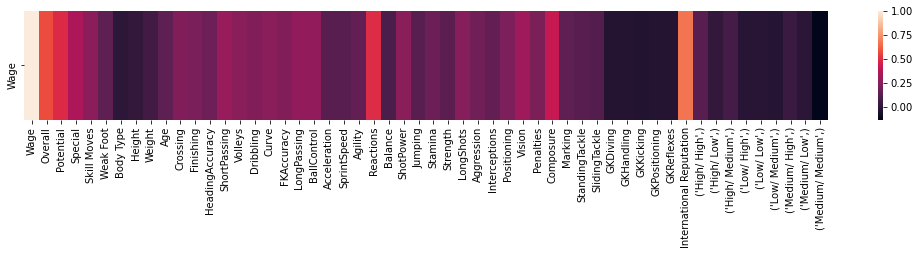

In [144]:
# sns.heatmap(X_q4.corr(method= 'pearson'))
plt.figure(figsize = (18,2))
sns.heatmap(X_q4.corr(method= 'pearson')[['Wage']].T)

In [160]:
top = 7
X_q4.corr(method= 'pearson').sort_values(['Wage'], ascending = False)[['Wage']].iloc[1:top+1,0:]

,Wage
International Reputation,0.670736
Overall,0.575940
Reactions,0.499564
Potential,0.488999
Composure,0.423256
Special,0.350178
Vision,0.317034


##### Q_2

<AxesSubplot:>

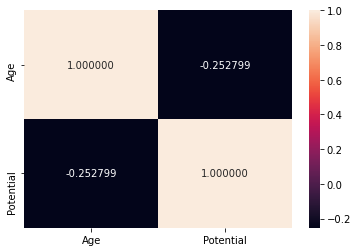

In [166]:
sns.heatmap(df[['Age','Potential']].corr(method= 'pearson'), annot=True, fmt="f")

In [170]:
# sns.heatmap(df[['Age','Value']].corr(method= 'pearson'), annot=True, fmt="f")
df['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [189]:
def con_val (x):
    try:
        return np.float(x.replace('K','').replace('€',''))/1000
    except:
        return np.float(x.replace('M','').replace('€',''))
df['Value'] = df['Value'].apply(con_val)

<AxesSubplot:>

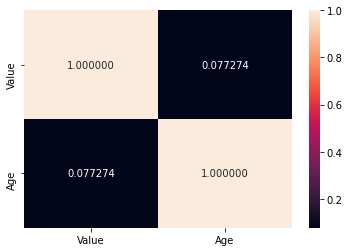

In [248]:
sns.heatmap(df[['Value','Age']].corr(method= 'pearson'), annot=True, fmt="f")

In [229]:
df.groupby(['Age']).median()[['SprintSpeed','Acceleration']]#.sort_values(ascending = False).head()
# df.groupby(['Age']).agg({'SprintSpeed': 'max'}).sort_values(by = 'SprintSpeed', ascending = False)

,SprintSpeed,Acceleration
Age,,
16,65.0,66.5
17,65.0,66.0
18,65.0,66.0
19,67.0,67.0
20,68.0,68.0
21,68.0,68.0
22,69.0,69.0
23,69.0,69.0
24,69.0,69.0
